In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [81]:
path = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df = pd.read_csv(path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
df.shape

(1599, 12)

We have 1599 rows and 12 columns including Target column(Quality)

In [83]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All datatypes are in float except quality which is our target variable which is integer

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [85]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:title={'center':'Null value Visualization'}>

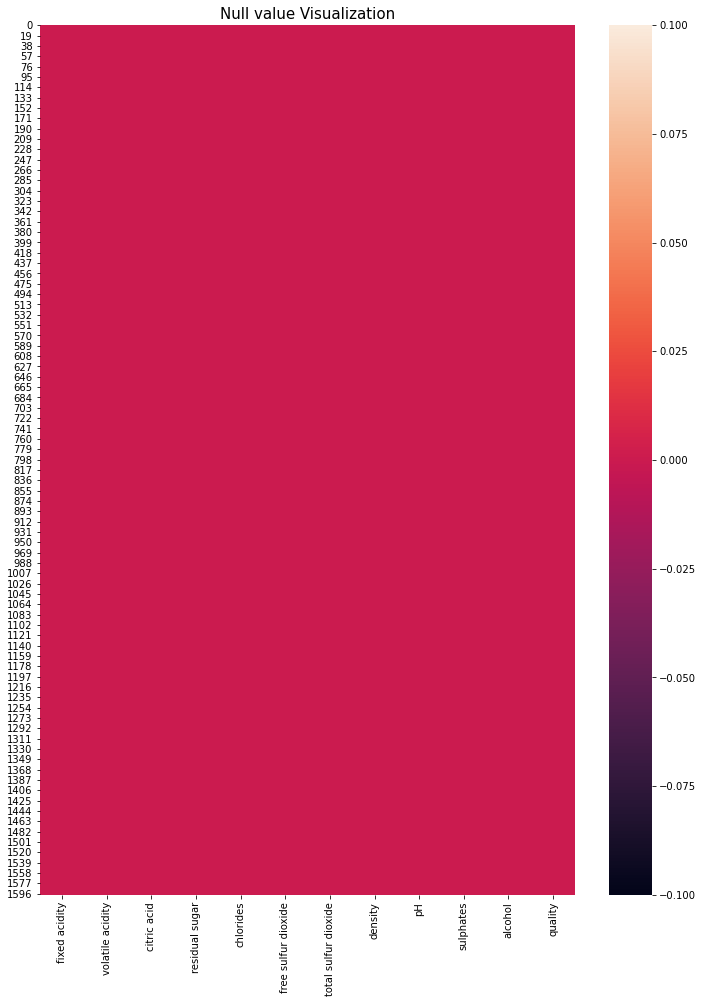

In [86]:
plt.figure(figsize=(12,16))
plt.title('Null value Visualization',fontsize=15)
sns.heatmap(df.isnull())

From the above observations we can say that we do not have any nll values in our dataset.

In [87]:
## Getting Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above statistical observation we can say that there is much difference between the 75% and max value of total sulfur dioxide which means there is outliers present in the column and also almost all the column follow normal distribution as the mean and 50% which is nothing but mean is almost same.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

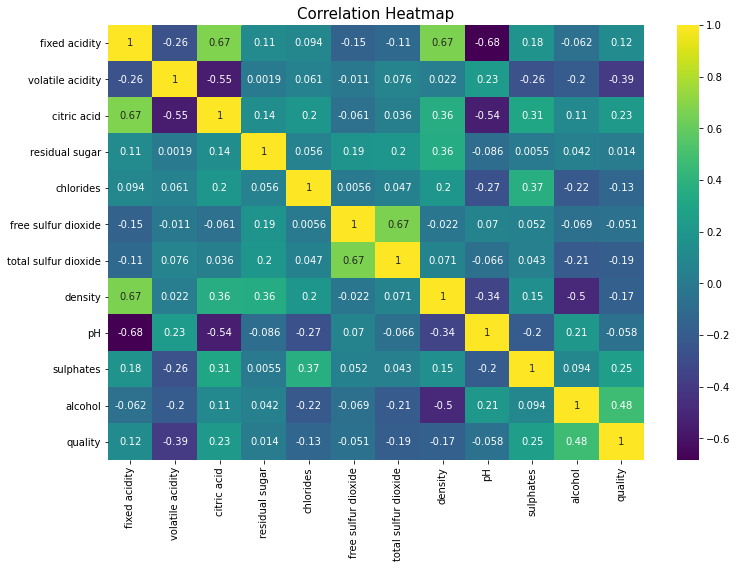

In [88]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

From the above correlation matrix we can say that all the columns are not much correlated with the target column.

In [89]:
collist = df.columns
collist

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

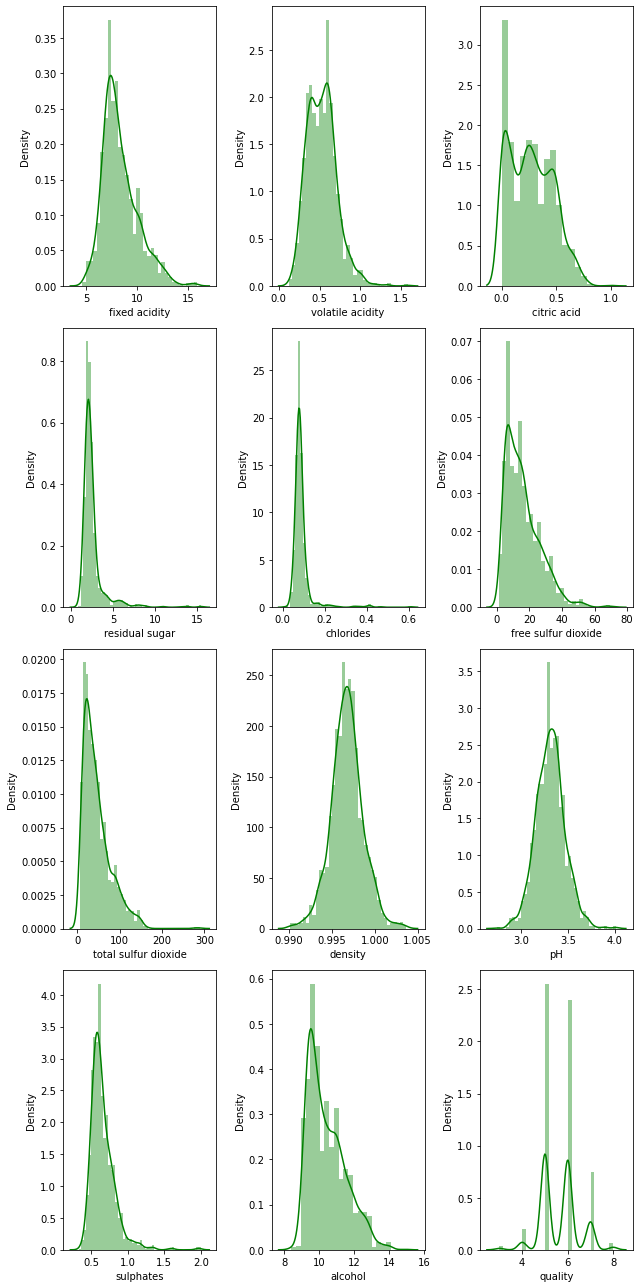

In [90]:
plt.figure(figsize = (9,18))
for i in range(0, len(collist)):
    plt.subplot(4,3, i+1)
    sns.distplot(df[collist[i]], color = 'green')
    plt.tight_layout()

From the above distribution plots we can say that some columns like residual sugars, chlorides, free sulfur dioxide and total sulfur dioxide are very much right skewed, which is needed to be treated.

# Checking Outliers


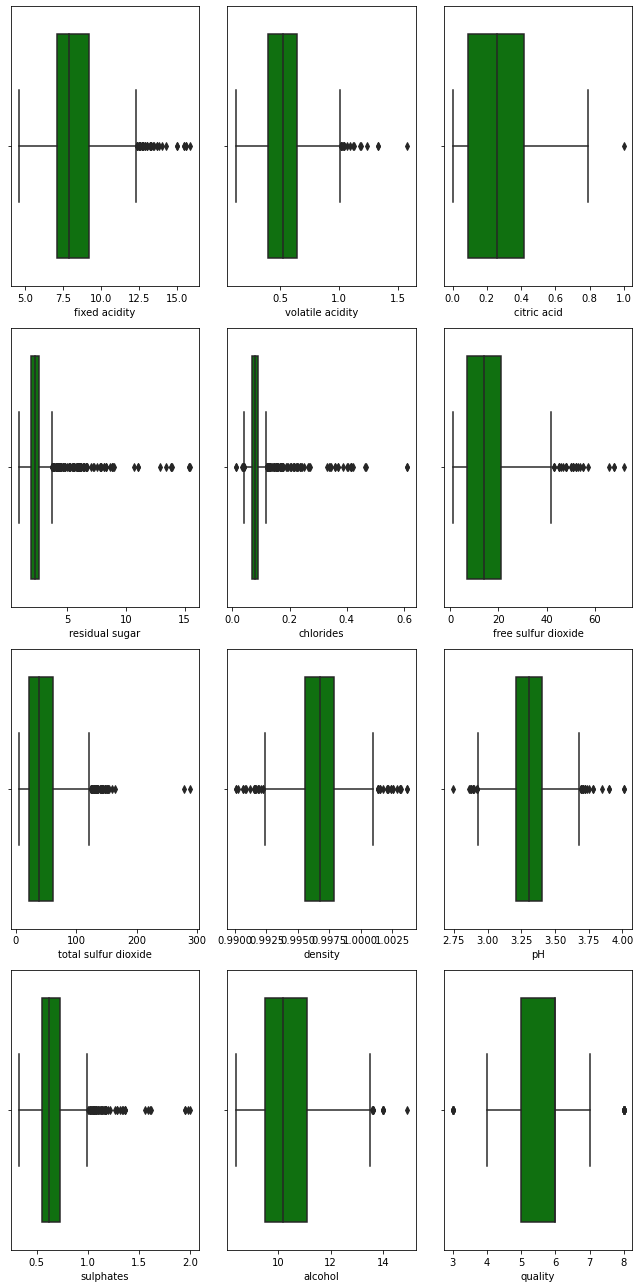

In [91]:
plt.figure(figsize = (9,18))
for i in range(0, len(collist)):
    plt.subplot(4,3, i+1)
    sns.boxplot(df[collist[i]], color = 'green')
    plt.tight_layout()

# Data Cleaning

In [92]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

In [93]:
print('Shape before and after')
print('Shape before'.ljust(20), ':', df.shape)
print('Shape after'.ljust(20), ':', df_new.shape)
print('Percentage Loss'.ljust(20), ':', ((df.shape[0] - df_new.shape[0])/df.shape[0])*100, '%')

Shape before and after
Shape before         : (1599, 12)
Shape after          : (1451, 12)
Percentage Loss      : 9.255784865540964 %


In [94]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [95]:
print('Shape before and after')
print('Shape before'.ljust(20), ':', df.shape)
print('Shape after'.ljust(20), ':', df_new2.shape)
print('Percentage Loss'.ljust(20), ':', ((df.shape[0] - df_new2.shape[0])/df.shape[0])*100, '%')

Shape before and after
Shape before         : (1599, 12)
Shape after          : (1179, 12)
Percentage Loss      : 26.26641651031895 %


From the above observation we can say that zscore method loses less data while removing outliers which is 9.25% which is less than 10% of our data. Hence we can go with the zscore method.

# Skewness

In [96]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [97]:
for col in df_new:
    if df_new[col].skew()>=.5:
        df_new[col]=np.log(df_new[col])

In [98]:
df_new.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

From the above transformation almost all skewness has been removed.

In [99]:
## Checking unique values in Target column
df_new['quality'].unique()

array([5, 6, 7, 4, 8], dtype=int64)

In [100]:
## Set a cutoff to convert multiclass class classification to Binary Class.
bins=[2,6,9]
labels=['Bad','Good']
df_new['quality']=pd.cut(df_new['quality'],bins=bins,labels=labels)
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,Bad
1,2.054124,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,Bad
2,2.054124,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,Bad
3,2.415914,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,Bad
4,2.001480,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,Bad


In [101]:
df_new['quality'].value_counts()

Bad     1250
Good     201
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Distribution of Target'}, xlabel='quality', ylabel='count'>

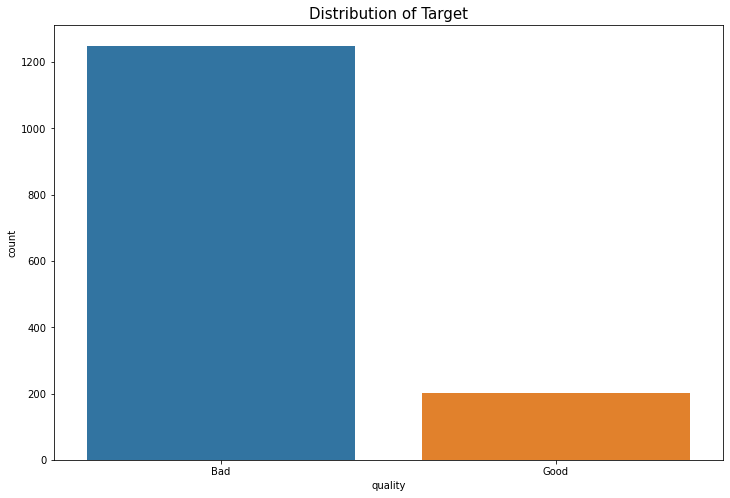

In [102]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Target',fontsize=15)
sns.countplot(df_new['quality'])

The above observations show us that the target column is imbalanced

# Encoding the Target variable

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['quality']=le.fit_transform(df_new['quality'])

In [104]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,0
1,2.054124,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,0
2,2.054124,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,0
3,2.415914,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,0
4,2.001480,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,0


# Splitting X and y

In [105]:
X=df_new.drop(['quality'],axis=1)
y=df_new[['quality']]

In [106]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.700,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710
1,2.054124,0.880,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,2.282382
2,2.054124,0.760,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,2.282382
3,2.415914,0.280,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,2.282382
4,2.001480,0.700,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.600,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,2.351375
1595,1.774952,0.550,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,2.415914
1596,1.840550,0.510,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,2.397895
1597,1.774952,0.645,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,2.322388


In [107]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_scaled=mm.fit_transform(X)
x_scaled=pd.DataFrame(x_scaled,columns=X.columns)
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.394706,0.630435,0.000000,0.267203,0.388764,0.622806,0.544620,0.588785,0.724138,0.420692,0.214134
1,0.447707,0.826087,0.000000,0.449585,0.531356,0.836040,0.757599,0.495327,0.367816,0.575141,0.302798
2,0.447707,0.695652,0.050633,0.378296,0.495921,0.703363,0.689872,0.514019,0.436782,0.539248,0.302798
3,0.811955,0.173913,0.708861,0.267203,0.381336,0.735871,0.722952,0.607477,0.321839,0.448607,0.302798
4,0.394706,0.630435,0.000000,0.267203,0.388764,0.622806,0.544620,0.588785,0.724138,0.420692,0.214134
...,...,...,...,...,...,...,...,...,...,...,...
1446,0.216573,0.521739,0.101266,0.297029,0.483594,0.900157,0.625572,0.317757,0.655172,0.448607,0.449590
1447,0.166639,0.467391,0.126582,0.352448,0.274572,0.951538,0.671926,0.338318,0.735632,0.663620,0.586905
1448,0.232682,0.423913,0.164557,0.378296,0.388764,0.874589,0.595647,0.396262,0.620690,0.653084,0.548568
1449,0.166639,0.570652,0.151899,0.297029,0.381336,0.900157,0.625572,0.371028,0.793103,0.609484,0.387915


# Feature Importance

[0.06730718 0.09943581 0.09499836 0.07786192 0.06852123 0.06445164
 0.08048636 0.08803359 0.06898453 0.11992358 0.16999579]


<AxesSubplot:>

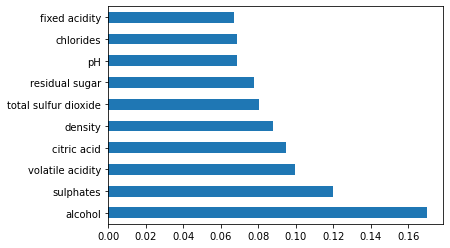

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
mod=ExtraTreesClassifier()
mod.fit(X,y)
print(mod.feature_importances_)
feat_importances=pd.Series(mod.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Model Building

In [109]:
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report,accuracy_score


In [110]:
y.isnull().sum()

quality    0
dtype: int64

In [111]:
def max_aucroc_score(clf,X,y):
    maxroc_auc=0
    for i in range(100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        X_train,y_train=SMOTE().fit_resample(X_train,y_train)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        roc_score=roc_auc_score(y_test,pred)
        if roc_score>maxroc_auc:
            maxroc_auc=roc_score
            final_r=i
    print('max Roc_auc score corresponding to',final_r,'is',maxroc_auc)
    return final_r

In [112]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'mlogloss')
max_aucroc_score(xgb, X, y)

max Roc_auc score corresponding to 10 is 0.9076195219123507


10

In [113]:
print('Mean Cross Validation score for XGBClassifier',cross_val_score(xgb,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(xgb,X,y,scoring='roc_auc').std())

Mean Cross Validation score for XGBClassifier 0.8572756097560976
Standard Deviation of cross Validation score 0.036467007996529126


In [114]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
max_aucroc_score(LR, X, y)


max Roc_auc score corresponding to 86 is 0.8773904382470118


86

In [115]:
print('Mean Cross Validation score for Logistic Regression',cross_val_score(LR,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(LR,X,y,scoring='roc_auc').std())

Mean Cross Validation score for Logistic Regression 0.8819819512195121
Standard Deviation of cross Validation score 0.02001318432774622


In [116]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
max_aucroc_score(DT,X,y)

max Roc_auc score corresponding to 3 is 0.8572709163346613


3

In [117]:
print('Mean Cross Validation score for Decision Tree Classifier',cross_val_score(DT,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(DT,X,y,scoring='roc_auc').std())

Mean Cross Validation score for Decision Tree Classifier 0.6586560975609757
Standard Deviation of cross Validation score 0.0616796479951007


In [118]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
max_aucroc_score(KNN,X,y)

max Roc_auc score corresponding to 65 is 0.8708665338645417


65

In [119]:
print('Mean Cross Validation score for KNN Classifier',cross_val_score(KNN,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(KNN,X,y,scoring='roc_auc').std())

Mean Cross Validation score for KNN Classifier 0.7724224390243903
Standard Deviation of cross Validation score 0.026446388280134816


In [120]:
from sklearn.svm import SVC
SVC=SVC()
max_aucroc_score(SVC,X,y)

max Roc_auc score corresponding to 49 is 0.8475099601593625


49

In [121]:
print('Mean Cross Validation score for Support Vector ',cross_val_score(SVC,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(SVC,X,y,scoring='roc_auc').std())

Mean Cross Validation score for Support Vector  0.8776741463414635
Standard Deviation of cross Validation score 0.023899767127915517


In [122]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
max_aucroc_score(RF,X,y)

max Roc_auc score corresponding to 49 is 0.8951195219123507


49

In [123]:
print('Mean Cross Validation score for Random Forest ',cross_val_score(RF,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(RF,X,y,scoring='roc_auc').std())

Mean Cross Validation score for Random Forest  0.8651465853658535
Standard Deviation of cross Validation score 0.019425390649961946


In [124]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
max_aucroc_score(GB,X,y)

max Roc_auc score corresponding to 72 is 0.891683266932271


72

In [125]:
print('Mean Cross Validation score for Gradient Boost ',cross_val_score(GB,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(GB,X,y,scoring='roc_auc').std())

Mean Cross Validation score for Gradient Boost  0.874270243902439
Standard Deviation of cross Validation score 0.03717722035421569


In [126]:
from sklearn.ensemble import AdaBoostClassifier
ADB=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
max_aucroc_score(ADB,X,y)

max Roc_auc score corresponding to 0 is 0.837699203187251


0

In [127]:
print('Mean Cross Validation score for AdaBoost ',cross_val_score(ADB,X,y,scoring='roc_auc').mean())
print('Standard Deviation of cross Validation score',cross_val_score(ADB,X,y,scoring='roc_auc').std())

Mean Cross Validation score for AdaBoost  0.6636560975609755
Standard Deviation of cross Validation score 0.06788453935997948


Hence from all the algorithms the least difference between the algorithm roc_auc score and cross val score is in Logistic Regression model, thus Logistic Regression is our best model.

# Hyperparameter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=86,test_size=.20,stratify=y)
X_train,y_train=SMOTE().fit_resample(X_train,y_train)

In [139]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring ='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train,y_train)
print('Best score is {} by using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best score is 0.8945334680134682 by using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [137]:
LR2 = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
LR2.fit(X_train, y_train)
pred = LR2.predict(X_test)
print('New Accuracy',accuracy_score(y_test,pred))
print('New roc_auc score',roc_auc_score(y_test,pred))

New Accuracy 0.8109965635738832
New roc_auc score 0.8589143426294821


Here we can see that by doing Hyperparameter Tuning our model gets less roc_auc score than the default parameters thus we will use the default paramters for the Logistic Regression model.

In [140]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred1 = LR.predict(X_test)
print('Accucacy score',accuracy_score(y_test,pred1))
print('roc_auc_socre',roc_auc_score(y_test,pred1))
print('Confusion matrix',confusion_matrix(y_test,pred1))
print('Classification report',classification_report(y_test,pred1))

Accucacy score 0.8144329896907216
roc_auc_socre 0.871414342629482
Confusion matrix [[199  52]
 [  2  38]]
Classification report               precision    recall  f1-score   support

           0       0.99      0.79      0.88       251
           1       0.42      0.95      0.58        40

    accuracy                           0.81       291
   macro avg       0.71      0.87      0.73       291
weighted avg       0.91      0.81      0.84       291



# Saving the Model

In [141]:
import joblib
joblib.dump(LR,'RedwinequalityLR.pkl')

['RedwinequalityLR.pkl']

In [142]:
model = joblib.load('RedwinequalityLR.pkl')
prediction = model.predict(X_test)
prediction 

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1])